Tutorial for using trackpy:
http://soft-matter.github.io/trackpy/v0.3.0/tutorial/walkthrough.html

In [2]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt

# the following line only works in an IPython notebook
%matplotlib notebook

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 6))
mpl.rc('image', cmap='gray')

In [3]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims
import trackpy as tp

from skimage import filters

In [4]:
frames = pims.ImageSequence('../data/huganir/tp*_results0001.tif', as_grey=True)

Original (base) Image we do detection on

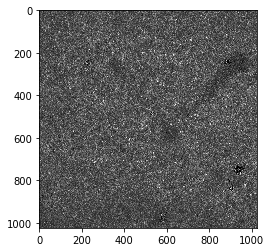

In [5]:
tp1 = pims.open('../data/R04_t001.tif')
background = tp1[1].clip(-2500, 10000)
plt.imshow(background)

Predicted Synapses from PLoS - threshold 0.9

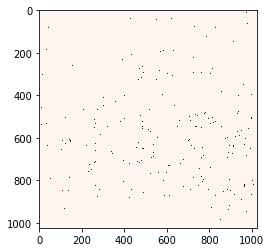

In [6]:
thresh = filters.threshold_otsu(frames[0])
plt.imshow(np.array(frames[0]) > thresh, cmap='Reds')

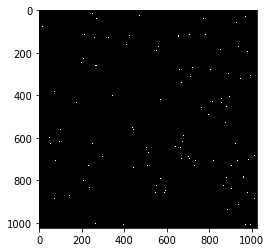

In [7]:
thresh = filters.threshold_otsu(frames[1])
plt.imshow(np.array(frames[1]) > thresh)

Detecting "features" in the predicted synapses. Second argument is estimated size of features in pixels

In [8]:
f = tp.locate(frames[1], 7)
#detect features

In [9]:
f.head(10) # shows the first few rows of data

,y,x,mass,size,ecc,signal,raw_mass,ep,frame
1,9.000000,902.000000,867.621009,1.025227,0.299290,199.855670,1438.0,0.0,1
2,11.448216,474.000000,3535.703985,1.344999,0.049888,530.738222,7195.0,0.0,1
3,13.788933,864.562931,5854.338465,1.573161,0.167871,631.676966,12960.0,0.0,1
4,14.999900,550.000000,870.229807,1.025786,0.298987,200.333950,1441.0,0.0,1
5,16.000000,251.000000,871.121146,1.025894,0.298950,200.486129,1442.0,0.0,1
6,18.000000,65.000000,872.838605,1.026244,0.298816,200.812229,1444.0,0.0,1
7,17.995435,228.000273,876.208302,1.029211,0.294932,201.007889,1455.0,0.0,1
8,18.000000,572.000000,874.556063,1.026544,0.298683,201.138329,1446.0,0.0,1
9,20.231898,265.286967,2996.748050,1.275611,0.365140,477.366562,5788.0,0.0,1
10,20.000000,723.000000,876.251782,1.026856,0.298518,201.442689,1448.0,0.0,1


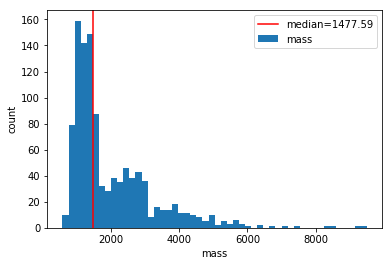

In [10]:
fig, ax = plt.subplots()
ax.hist(f['mass'], bins=50)

# Optionally, label the axes.
ax.set(xlabel='mass', ylabel='count')
plt.axvline(x=np.median(f['mass']), color='red', label='median={:.2f}'.format(np.median(f['mass'])))
plt.legend()

In [11]:
f = tp.locate(frames[1], 7, percentile=0.99)
f = tp.locate(frames[1], 7, minmass=np.median(f['mass']), percentile=0.99)

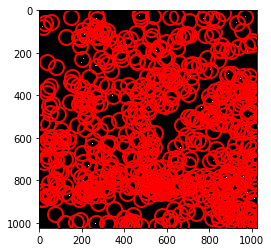

In [12]:
plt.figure()
tp.annotate(f, frames[1])

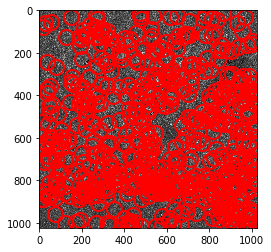

In [13]:
plt.figure()
tp.annotate(f, background)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9ad5ed9828>,
      dtype=object)

<Figure size 432x288 with 0 Axes>

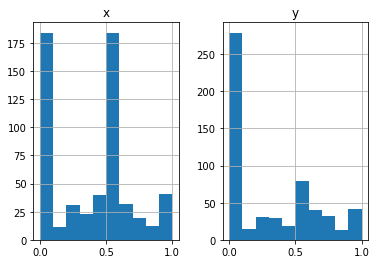

In [14]:
plt.figure()
tp.subpx_bias(f)

In [15]:
f = tp.batch(frames, 15, minmass=1000, percentile=0.95)

Frame 3: 781 features


In [16]:
t = tp.link_df(f, 10, memory=0)

Frame 3: 781 trajectories present.


In [17]:
t.head(10)

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
0,8.014915,266.518446,4200.956813,1.462872,0.301526,616.691345,4996.0,0.000041,0,0
561,629.572106,518.185650,8657.478680,1.997748,0.114054,1114.221538,9993.0,0.000021,0,1
562,631.000000,964.500000,5781.501598,1.433310,0.301535,823.685276,6670.0,0.000031,0,2
563,632.000000,10.000000,2941.912381,1.275975,0.213163,516.918165,3336.0,0.000062,0,3
564,632.500000,240.000000,2960.733690,1.432300,0.030907,422.204478,3420.0,0.000060,0,4
565,632.616309,538.899151,7956.435487,3.360831,0.512404,556.382202,11901.0,0.000017,0,5
566,633.906293,618.581003,11826.096773,1.997174,0.253284,1038.491063,15417.0,0.000013,0,6
567,632.501035,691.500318,5475.989241,2.082774,0.405040,505.665855,6670.0,0.000031,0,7
568,635.445950,746.742760,14315.731056,2.430925,0.241905,975.308129,20624.0,0.000010,0,8
569,634.874383,982.950832,2910.907814,1.653611,0.199838,517.403877,3339.0,0.000062,0,9


In [18]:
t1 = tp.filter_stubs(t, 2)
# Compare the number of particles in the unfiltered and filtered data.
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())

Before: 2403
After: 607


In [28]:
pd.concat(g for _, g in t.groupby("particle") if len(g) == 1)

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
0,8.014915,266.518446,4200.956813,1.462872,0.301526,616.691345,4996.0,0.000041,0,0
561,629.572106,518.185650,8657.478680,1.997748,0.114054,1114.221538,9993.0,0.000021,0,1
564,632.500000,240.000000,2960.733690,1.432300,0.030907,422.204478,3420.0,0.000060,0,4
565,632.616309,538.899151,7956.435487,3.360831,0.512404,556.382202,11901.0,0.000017,0,5
566,633.906293,618.581003,11826.096773,1.997174,0.253284,1038.491063,15417.0,0.000013,0,6
567,632.501035,691.500318,5475.989241,2.082774,0.405040,505.665855,6670.0,0.000031,0,7
568,635.445950,746.742760,14315.731056,2.430925,0.241905,975.308129,20624.0,0.000010,0,8
570,635.737877,221.245050,11170.912813,1.636147,0.197180,1114.666773,13752.0,0.000015,0,10
571,636.000000,716.500000,5795.020560,1.433458,0.301496,825.506693,6684.0,0.000031,0,12
573,637.000000,671.500000,5799.230057,1.433580,0.301466,825.992405,6688.0,0.000031,0,13


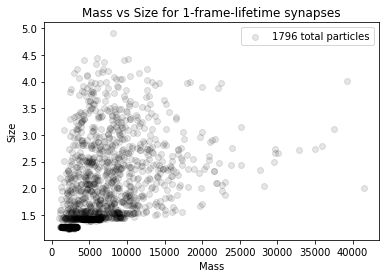

In [107]:
plt.figure()
plt.title('Mass vs Size for 1-frame-lifetime synapses')
plt.xlabel('Mass')
plt.ylabel('Size')
df = pd.concat(g for _, g in t.groupby("particle") if len(g) == 1)
count = len(df.particle.unique())
plt.scatter(df['mass'], df['size'], c='k', alpha=0.1, label="{} total particles".format(count))
plt.legend()
plt.savefig('../figures/1_frame_lifetime.png')

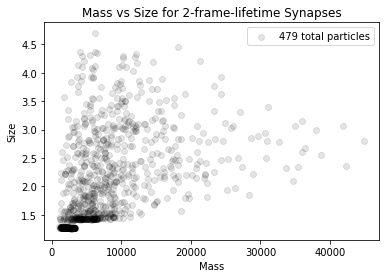

In [108]:
plt.figure()
plt.title('Mass vs Size for 2-frame-lifetime Synapses')
plt.xlabel('Mass')
plt.ylabel('Size')
df = pd.concat(g for _, g in t.groupby("particle") if len(g) == 2)
count = len(df.particle.unique())
plt.scatter(df['mass'], df['size'], c='k', alpha=0.1, label="{} total particles".format(count))
plt.legend()
plt.savefig('../figures/2_frame_lifetime.png')

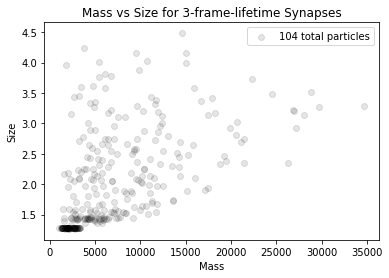

In [109]:
plt.figure()
plt.title('Mass vs Size for 3-frame-lifetime Synapses')
plt.xlabel('Mass')
plt.ylabel('Size')
df = pd.concat(g for _, g in t.groupby("particle") if len(g) == 3)
count = len(df.particle.unique())
plt.scatter(df['mass'], df['size'], c='k', alpha=0.1, label="{} total particles".format(count))
plt.legend()
plt.savefig('../figures/3_frame_lifetime.png')

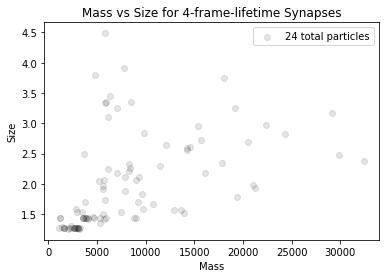

In [110]:
plt.figure()
plt.title('Mass vs Size for 4-frame-lifetime Synapses')
plt.xlabel('Mass')
plt.ylabel('Size')
df = pd.concat(g for _, g in t.groupby("particle") if len(g) == 4)
count = len(df.particle.unique())
plt.scatter(df['mass'], df['size'], c='k', alpha=0.1, label="{} total particles".format(count))
plt.legend()
plt.savefig('../figures/4_frame_lifetime.png')

In [57]:
t.loc[t['particle'] == 2]

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
562,631.0,964.5,5781.501598,1.433310,0.301535,823.685276,6670.0,0.000031,0,2
1302,623.0,960.5,3065.787884,1.671601,0.416869,327.834424,3680.0,0.000000,1,2


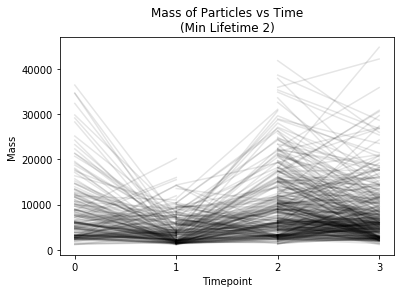

In [68]:
plt.figure()
plt.title("Mass of Particles vs Time\n(Min Lifetime 2)")
plt.xlabel('Timepoint')
plt.xticks(np.arange(4))
plt.ylabel('Mass')
df = pd.concat(g for _, g in t.groupby("particle") if len(g) > 1)
for i in df.particle.unique():
    df1 = t.loc[t['particle'] == i]
    plt.plot(df1['frame'], df1['mass'], 'k-', alpha=0.1)
    
plt.savefig('../figures/mass_vs_time_min_lifetime_2.png')

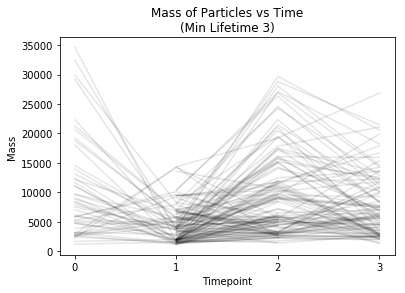

In [69]:
plt.figure()
plt.title("Mass of Particles vs Time\n(Min Lifetime 3)")
plt.xlabel('Timepoint')
plt.xticks(np.arange(4))
plt.ylabel('Mass')
df = pd.concat(g for _, g in t.groupby("particle") if len(g) > 2)
for i in df.particle.unique():
    df1 = t.loc[t['particle'] == i]
    plt.plot(df1['frame'], df1['mass'], 'k-', alpha=0.1)
    
plt.savefig('../figures/mass_vs_time_min_lifetime_3.png')

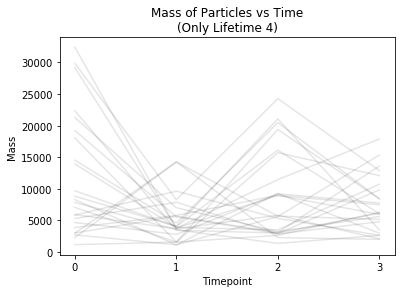

In [70]:
plt.figure()
plt.title("Mass of Particles vs Time\n(Only Lifetime 4)")
plt.xlabel('Timepoint')
plt.xticks(np.arange(4))
plt.ylabel('Mass')
df = pd.concat(g for _, g in t.groupby("particle") if len(g) > 3)
for i in df.particle.unique():
    df1 = t.loc[t['particle'] == i]
    plt.plot(df1['frame'], df1['mass'], 'k-', alpha=0.1)
    
plt.savefig('../figures/mass_vs_time_min_lifetime_4.png')

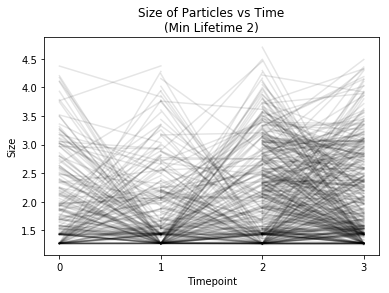

In [71]:
plt.figure()
plt.title("Size of Particles vs Time\n(Min Lifetime 2)")
plt.xlabel('Timepoint')
plt.xticks(np.arange(4))
plt.ylabel('Size')
df = pd.concat(g for _, g in t.groupby("particle") if len(g) > 1)
for i in df.particle.unique():
    df1 = t.loc[t['particle'] == i]
    plt.plot(df1['frame'], df1['size'], 'k-', alpha=0.1)
    
plt.savefig('../figures/size_vs_time_min_lifetime_2.png')

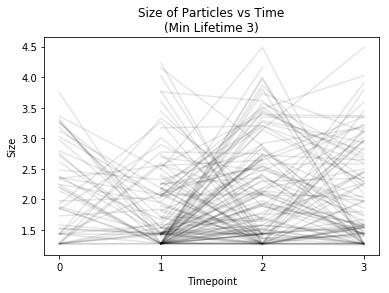

In [72]:
plt.figure()
plt.title("Size of Particles vs Time\n(Min Lifetime 3)")
plt.xlabel('Timepoint')
plt.xticks(np.arange(4))
plt.ylabel('Size')
df = pd.concat(g for _, g in t.groupby("particle") if len(g) > 2)
for i in df.particle.unique():
    df1 = t.loc[t['particle'] == i]
    plt.plot(df1['frame'], df1['size'], 'k-', alpha=0.1)
    
plt.savefig('../figures/size_vs_time_min_lifetime_3.png')

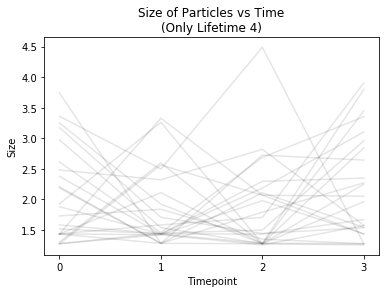

In [73]:
plt.figure()
plt.title("Size of Particles vs Time\n(Only Lifetime 4)")
plt.xlabel('Timepoint')
plt.xticks(np.arange(4))
plt.ylabel('Size')
df = pd.concat(g for _, g in t.groupby("particle") if len(g) > 3)
for i in df.particle.unique():
    df1 = t.loc[t['particle'] == i]
    plt.plot(df1['frame'], df1['size'], 'k-', alpha=0.1)
    
plt.savefig('../figures/size_vs_time_min_lifetime_4.png')

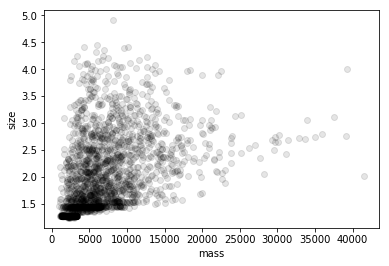

In [20]:
plt.figure()
tp.mass_size(t.groupby('particle').mean())  # convenience function -- just plots size vs. mass

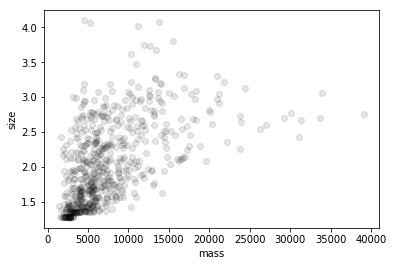

In [21]:
plt.figure()
tp.mass_size(t1.groupby('particle').mean())  # convenience function -- just plots size vs. mass

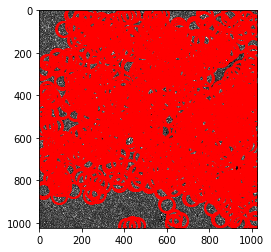

In [22]:
plt.figure()
tp.annotate(t1, background)

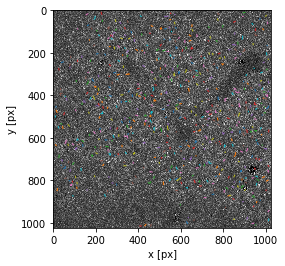

In [23]:
plt.figure()
tp.plot_traj(t1, superimpose=background)

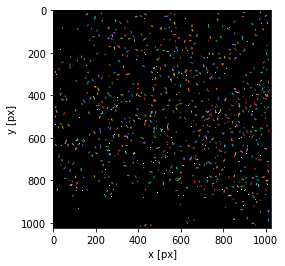

In [24]:
plt.figure()
tp.plot_traj(t1, superimpose=frames[0])

In [25]:
d = tp.compute_drift(t1)

/home/dli/anaconda2/envs/lids/lib/python3.6/site-packages/trackpy/motion.py:289: FutureWarning: 'frame' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  dx = f_diff.loc[mask, pos_columns + ['frame']].groupby('frame').mean()


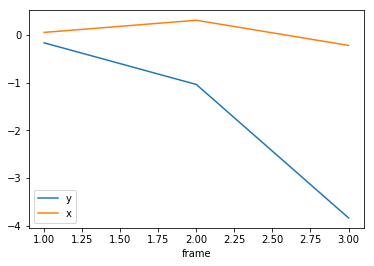

In [26]:
d.plot()

In [25]:
tm = tp.subtract_drift(t1, d)

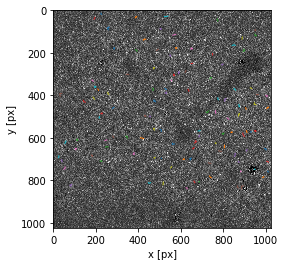

In [26]:
plt.figure()
tp.plot_traj(tm, superimpose=background)

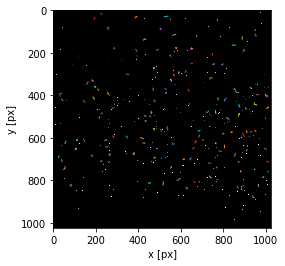

In [27]:
plt.figure()
tp.plot_traj(tm, superimpose=frames[0])

In [28]:
im = tp.imsd(tm, 0.09, 1)  # microns per pixel = 0.09., frames per second = 24

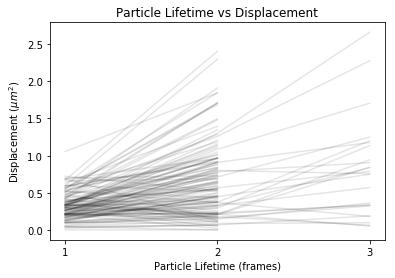

In [29]:
fig, ax = plt.subplots()
ax.plot(im.index, im, 'k-', alpha=0.1)  # black lines, semitransparent
ax.set(title='Particle Lifetime vs Displacement',
       ylabel=r'Displacement $(\mu m^2)$',
       xlabel='Particle Lifetime (frames)')
ax.set_xticks(np.arange(1, 4, 1.0))


In [120]:
mass_f0 = t[t['frame']==0].sort_values(by=['mass'], ascending=False)

In [121]:
mass_f0.head(10)

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
520,585.667965,287.125633,41492.609494,2.005932,0.136566,2652.590398,55607.0,0.000004,0,173
757,823.065099,965.502844,39277.847284,4.003384,0.605709,1267.827711,62972.0,0.000003,0,249
620,688.365482,537.535568,37493.384740,3.118516,0.180850,1446.002776,71536.0,0.000003,0,59
614,678.973276,306.693260,36473.714986,2.674773,0.368960,2053.182277,54336.0,0.000004,0,64
492,556.376741,485.447402,35923.687506,2.797635,0.306776,1186.025846,57408.0,0.000004,0,199
827,938.181335,891.128797,34687.350073,2.103592,0.068671,2004.732583,49180.0,0.000004,0,277
540,603.428478,424.490233,34641.450363,3.279073,0.221785,1083.905062,59957.0,0.000003,0,33
443,507.481241,996.469280,32918.551715,2.720119,0.174161,1029.464930,52972.0,0.000004,0,149
546,610.746485,110.237797,32409.607309,2.377266,0.085690,2365.696971,46306.0,0.000004,0,39
508,571.342776,933.388246,29847.763958,2.480593,0.202121,1264.427732,42784.0,0.000005,0,161


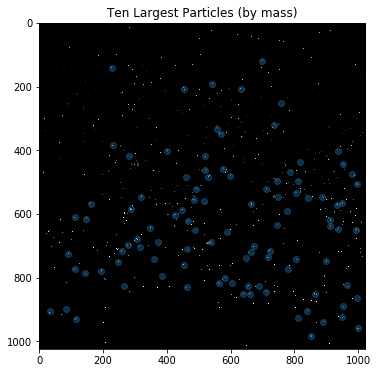

In [168]:
plt.figure(figsize=(10,6))
plt.title("Ten Largest Particles (by mass)")
plt.imshow(frames[0])
plt.scatter(mass_f0['x'][:100], mass_f0['y'][:100], alpha=0.4)

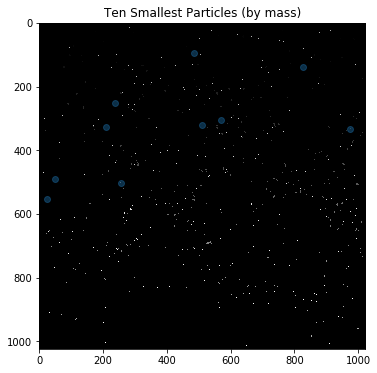

In [166]:
plt.figure(figsize=(10,6))
plt.title("Ten Smallest Particles (by mass)")
plt.imshow(frames[0])
plt.scatter(mass_f0.sort_values(by=['mass'])['x'][:10], mass_f0.sort_values(by=['mass'])['y'][:10], alpha=0.4)

In [143]:
size_f0 = t[t['frame']==0].sort_values(by=['size'], ascending=False)

In [144]:
size_f0.head(10)

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
195,255.523921,158.109405,5983.071754,4.443119,0.370031,408.766467,8380.0,0.000025,0,487
197,264.491101,428.407548,6167.803921,4.372040,0.728701,421.921146,8425.0,0.000024,0,489
116,171.912636,301.015040,5832.015565,4.323633,0.122375,390.714200,8031.0,0.000026,0,461
254,327.483758,904.496010,6867.956644,4.243361,0.502945,438.718659,10425.0,0.000020,0,760
278,348.434346,953.401272,12653.829643,4.232137,0.553847,710.595514,19542.0,0.000011,0,838
690,758.999949,455.102546,21387.443557,4.201856,0.798741,1363.796153,28094.0,0.000007,0,369
514,584.066962,117.629992,7411.305595,4.201802,0.789863,492.106417,9600.0,0.000021,0,167
345,410.717258,236.951531,6732.443214,4.172634,0.551512,453.532851,9015.0,0.000023,0,663
327,395.916137,846.262717,12293.917629,4.170369,0.746822,521.977657,17580.0,0.000012,0,673
697,766.389385,965.705369,11528.922458,4.164040,0.550954,807.494902,18972.0,0.000011,0,403


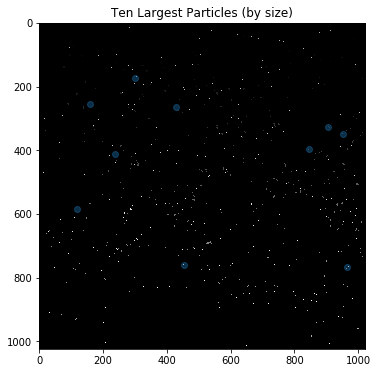

In [164]:
plt.figure(figsize=(10,6))
plt.title("Ten Largest Particles (by size)")
plt.imshow(frames[0])
plt.scatter(size_f0['x'][:10], size_f0['y'][:10], alpha=0.4)

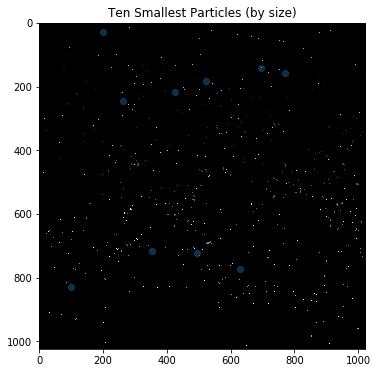

In [165]:
plt.figure(figsize=(10,6))
plt.title("Ten Smallest Particles (by size)")
plt.imshow(frames[0])
plt.scatter(size_f0.sort_values(['size'])['x'][:10], size_f0.sort_values(['size'])['y'][:10], alpha=0.4)

(array([887.,  14., 422., 126., 179.,  62.,  79.,  66.,  69.,  62.,  62.,
         76.,  63.,  76.,  56.,  72.,  57.,  61.,  47.,  44.,  53.,  55.,
         38.,  34.,  46.,  43.,  30.,  28.,  39.,  26.,  25.,  20.,  15.,
         11.,  20.,  17.,  15.,  14.,  11.,  14.,   8.,   5.,   6.,   5.,
          2.,   0.,   0.,   1.,   0.,   1.]),
 array([1.23479725, 1.30832566, 1.38185406, 1.45538247, 1.52891087,
        1.60243928, 1.67596768, 1.74949609, 1.82302449, 1.8965529 ,
        1.9700813 , 2.04360971, 2.11713811, 2.19066652, 2.26419492,
        2.33772333, 2.41125173, 2.48478014, 2.55830854, 2.63183695,
        2.70536535, 2.77889376, 2.85242217, 2.92595057, 2.99947898,
        3.07300738, 3.14653579, 3.22006419, 3.2935926 , 3.367121  ,
        3.44064941, 3.51417781, 3.58770622, 3.66123462, 3.73476303,
        3.80829143, 3.88181984, 3.95534824, 4.02887665, 4.10240505,
        4.17593346, 4.24946187, 4.32299027, 4.39651868, 4.47004708,
        4.54357549, 4.61710389, 4.6906323 , 4.

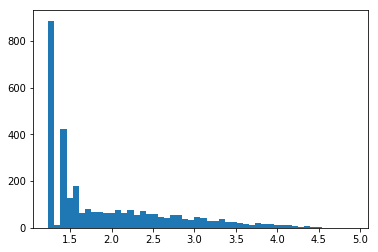

In [162]:
plt.figure()
plt.hist(t['size'], bins=50)

(array([240., 565., 421., 248., 243., 259., 162., 136., 156., 124., 107.,
         70.,  60.,  44.,  42.,  43.,  32.,  29.,  26.,  18.,  12.,  15.,
         15.,  16.,  10.,   6.,   7.,   6.,   4.,   5.,   3.,   5.,   7.,
          3.,   2.,   1.,   2.,   1.,   4.,   4.,   1.,   1.,   2.,   1.,
          0.,   0.,   2.,   1.,   0.,   1.]),
 array([ 1006.79030053,  1883.69539618,  2760.60049183,  3637.50558748,
         4514.41068312,  5391.31577877,  6268.22087442,  7145.12597006,
         8022.03106571,  8898.93616136,  9775.84125701, 10652.74635265,
        11529.6514483 , 12406.55654395, 13283.4616396 , 14160.36673524,
        15037.27183089, 15914.17692654, 16791.08202219, 17667.98711783,
        18544.89221348, 19421.79730913, 20298.70240478, 21175.60750042,
        22052.51259607, 22929.41769172, 23806.32278737, 24683.22788301,
        25560.13297866, 26437.03807431, 27313.94316996, 28190.8482656 ,
        29067.75336125, 29944.6584569 , 30821.56355255, 31698.46864819,
        32

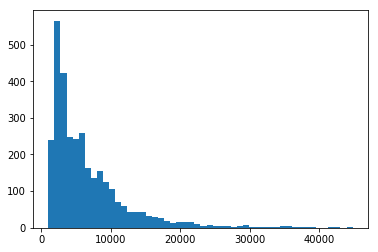

In [163]:
plt.figure()
plt.hist(t['mass'], bins=50)